### 사용 라이브러리

In [573]:
import pandas as pd
import numpy as np

# 그래프 관련 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib.pyplot import style

# 스타일 설정
style.use('seaborn')

# 한글 폰트 설정
if (platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 음수(-)가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False 

## 소각시설

### 1.0 데이터 불러오기

In [620]:
df = pd.read_csv("./data/지방자치단체_폐기물_처리시설_현황_소각시설(10-19).csv",encoding="utf-8")


### 2.0 데이터 탐색 및 전처리

In [621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  170 non-null    int64 
 1   시도          170 non-null    object
 2   시설 수        170 non-null    object
 3   일별 시설용량(톤)  170 non-null    object
 4   1일평균가동시간    170 non-null    object
 5   처리량 (톤)     170 non-null    object
 6   설치비 (국비)    170 non-null    object
 7   설치비 (지방비)   170 non-null    object
 8   설치비 (기타)    170 non-null    object
 9   연간유지관리비     170 non-null    object
 10  관리인원        170 non-null    object
 11  외부공급(열)     170 non-null    object
 12  외부공급(전력)    170 non-null    object
 13  자체사용(열)     170 non-null    object
 14  자체사용(전력)    170 non-null    object
 15  연도          170 non-null    int64 
dtypes: int64(2), object(14)
memory usage: 21.4+ KB


In [622]:
#첫번째 컬럼 삭제
df = df.drop(df.columns[[0]], axis=1)

In [623]:
#2010,2011 세종 '-' 결측 / 2018,2019 광주 '-' 결측
df.isnull().sum()
#'-'결측치 0으로 변경
df.replace('-', '0', inplace=True)

In [624]:
df['연도'] = df['연도'].astype('object')

df['시설 수'] = df['시설 수'].astype('int')

df['일별 시설용량(톤)'] = df['일별 시설용량(톤)'].astype('float')

df['1일평균가동시간'] = df['1일평균가동시간'].astype('float')

df['처리량 (톤)'] = df['처리량 (톤)'].astype('float')

df['설치비 (국비)'] = df['설치비 (국비)'].astype('float')

df['설치비 (지방비)'] = df['설치비 (지방비)'].astype('float')

df['설치비 (기타)'] = df['설치비 (기타)'].astype('float')

df['연간유지관리비'] = df['연간유지관리비'].astype('float')

df['관리인원'] = df['관리인원'].astype('int')

df['외부공급(열)'] = df['외부공급(열)'].astype('float')

df['외부공급(전력)'] = df['외부공급(전력)'].astype('float')

df['자체사용(열)'] = df['자체사용(열)'].astype('float')

df['자체사용(전력)'] = df['자체사용(전력)'].astype('float')


In [625]:
df.shape

(170, 15)

In [626]:
df.describe()

,시설 수,일별 시설용량(톤),1일평균가동시간,처리량 (톤),설치비 (국비),설치비 (지방비),설치비 (기타),연간유지관리비,관리인원,외부공급(열),외부공급(전력),자체사용(열),자체사용(전력)
count,170.000000,170.000000,170.000000,1.700000e+02,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02,170.000000,1.700000e+02,1.700000e+02
mean,10.617647,1003.864706,20.047059,2.568023e+05,50874.658824,136642.423529,51011.135294,26923.605882,209.717647,2.588961e+05,27345.929412,1.706589e+05,6.694962e+04
std,12.859769,1212.832637,5.856076,2.954927e+05,49470.440002,164863.343846,116631.922792,32850.454345,232.543416,4.108791e+05,52595.384358,2.216507e+05,1.759170e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1.000000,400.000000,19.000000,9.893450e+04,20542.000000,48970.000000,0.000000,8930.500000,56.000000,2.009800e+04,0.000000,4.641775e+04,5.822500e+02
50%,6.000000,591.000000,23.000000,1.543525e+05,44822.000000,78273.000000,11911.500000,16041.000000,108.000000,1.403190e+05,13.500000,8.853400e+04,2.438300e+04
75%,15.750000,930.000000,24.000000,2.628852e+05,61567.500000,144232.000000,46288.250000,27238.000000,279.250000,2.372022e+05,34104.500000,2.219738e+05,8.550800e+04
max,56.000000,5304.000000,24.000000,1.349194e+06,250761.000000,759593.000000,604104.000000,192531.000000,1157.000000,1.857502e+06,285307.000000,1.098394e+06,2.151151e+06


In [581]:
df.corr()

#시설 수와 처리량은 거의 상관관계가 없음.
#연간유지관리비와 관리인원은 상관관계가 높음.
#처리량과 외부공급(열)/자체사용(열)의 상관관계가 높은 것을 보아 대부분은 열에너지로 활용되는 것으로 추정됨.

,시설 수,일별 시설용량(톤),1일평균가동시간,처리량 (톤),설치비 (국비),설치비 (지방비),설치비 (기타),연간유지관리비,관리인원,외부공급(열),외부공급(전력),자체사용(열),자체사용(전력)
시설 수,1.000000,0.266799,-0.295116,0.246991,0.483285,0.325620,0.326261,0.378704,0.577420,0.127121,0.083827,0.323533,0.167184
일별 시설용량(톤),0.266799,1.000000,0.246712,0.992557,0.761091,0.979458,0.867646,0.945992,0.883929,0.945751,0.158932,0.930929,0.486023
1일평균가동시간,-0.295116,0.246712,1.000000,0.262438,0.058083,0.203065,0.209039,0.214872,0.151355,0.277375,0.072740,0.170207,0.119921
처리량 (톤),0.246991,0.992557,0.262438,1.000000,0.756641,0.971360,0.844315,0.946891,0.873085,0.954929,0.157488,0.932218,0.477590
설치비 (국비),0.483285,0.761091,0.058083,0.756641,1.000000,0.800177,0.813691,0.833519,0.866386,0.594531,0.306956,0.815610,0.538799
설치비 (지방비),0.325620,0.979458,0.203065,0.971360,0.800177,1.000000,0.858701,0.951875,0.910118,0.908823,0.132395,0.935130,0.489433
설치비 (기타),0.326261,0.867646,0.209039,0.844315,0.813691,0.858701,1.000000,0.891229,0.893174,0.744247,0.181069,0.869855,0.561186
연간유지관리비,0.378704,0.945992,0.214872,0.946891,0.833519,0.951875,0.891229,1.000000,0.952117,0.870352,0.179285,0.925106,0.601539
관리인원,0.577420,0.883929,0.151355,0.873085,0.866386,0.910118,0.893174,0.952117,1.000000,0.752365,0.217965,0.879091,0.553433
외부공급(열),0.127121,0.945751,0.277375,0.954929,0.594531,0.908823,0.744247,0.870352,0.752365,1.000000,0.010774,0.874822,0.434474


In [644]:
df.columns

Index(['시도', '시설 수', '일별 시설용량(톤)', '1일평균가동시간', '처리량 (톤)', '설치비 (국비)',
       '설치비 (지방비)', '설치비 (기타)', '연간유지관리비', '관리인원', '외부공급(열)', '외부공급(전력)',
       '자체사용(열)', '자체사용(전력)', '연도'],
      dtype='object')

### 3.0 시각적 EDA

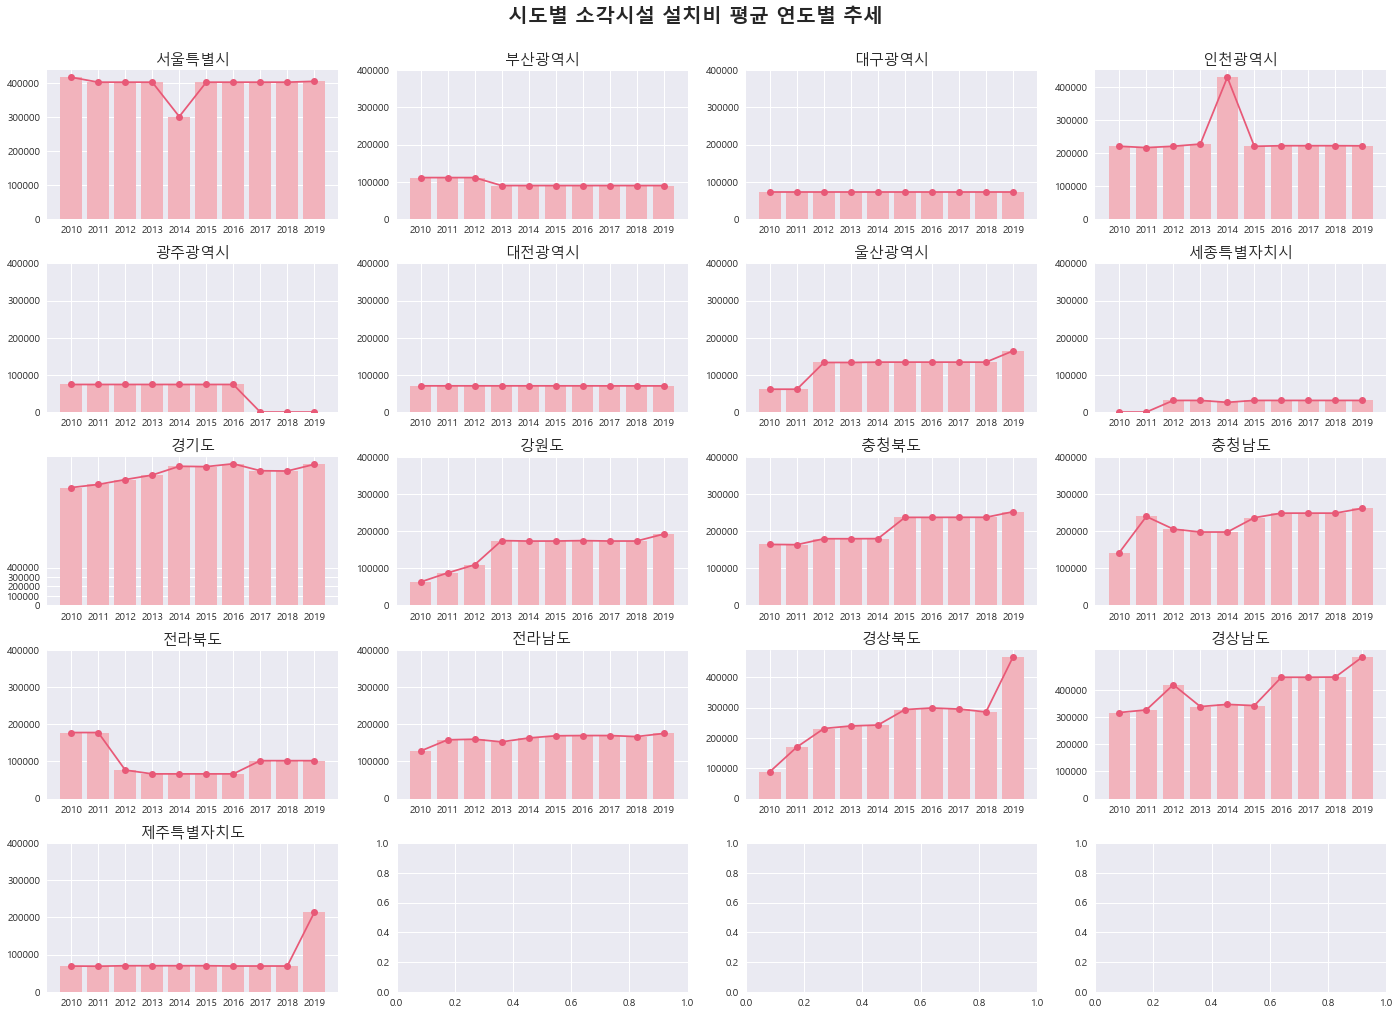

In [655]:
fig, axs = plt.subplots(5, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df['시도'].unique():
    sido_condition = df['시도']== i
    df_temp = df[sido_condition].groupby(df['연도'])[['시설 수', '일별 시설용량(톤)', '1일평균가동시간', '처리량 (톤)', '설치비 (국비)',
       '설치비 (지방비)', '설치비 (기타)', '연간유지관리비', '관리인원', '외부공급(열)', '외부공급(전력)',
       '자체사용(열)', '자체사용(전력)']].mean().reset_index()
    in_sum = df_temp[['설치비 (국비)','설치비 (지방비)','설치비 (기타)']].sum(axis=1)
    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['연도'], in_sum, color='#f2b3bc')
    axs[ax, ay].plot(df_temp['연도'], in_sum, color='#e85977', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 500000, 100000)))
    axs[ax, ay].set_xticks(list(df['연도'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 소각시설 설치비 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

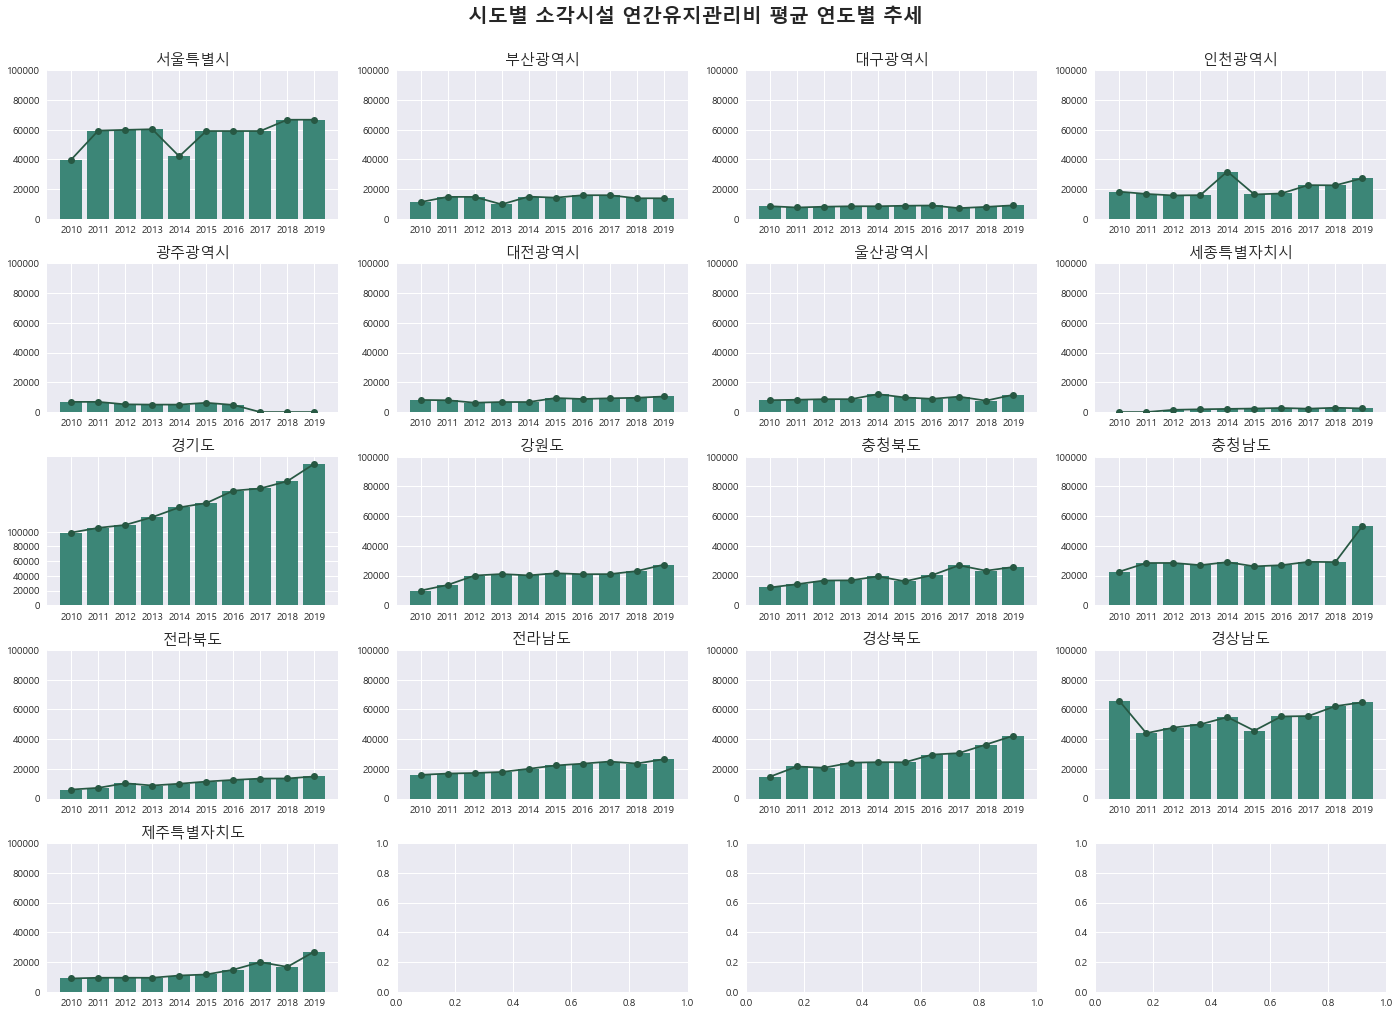

In [670]:
fig, axs = plt.subplots(5, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df['시도'].unique():
    sido_condition = df['시도']== i
    df_temp = df[sido_condition].groupby(df['연도'])[['시설 수', '일별 시설용량(톤)', '1일평균가동시간', '처리량 (톤)', '설치비 (국비)',
       '설치비 (지방비)', '설치비 (기타)', '연간유지관리비', '관리인원', '외부공급(열)', '외부공급(전력)',
       '자체사용(열)', '자체사용(전력)']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['연도'], df_temp['연간유지관리비'], color='#3c8677')
    axs[ax, ay].plot(df_temp['연도'], df_temp['연간유지관리비'], color='#275843', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 110000, 20000)))
    axs[ax, ay].set_xticks(list(df['연도'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 소각시설 연간유지관리비 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

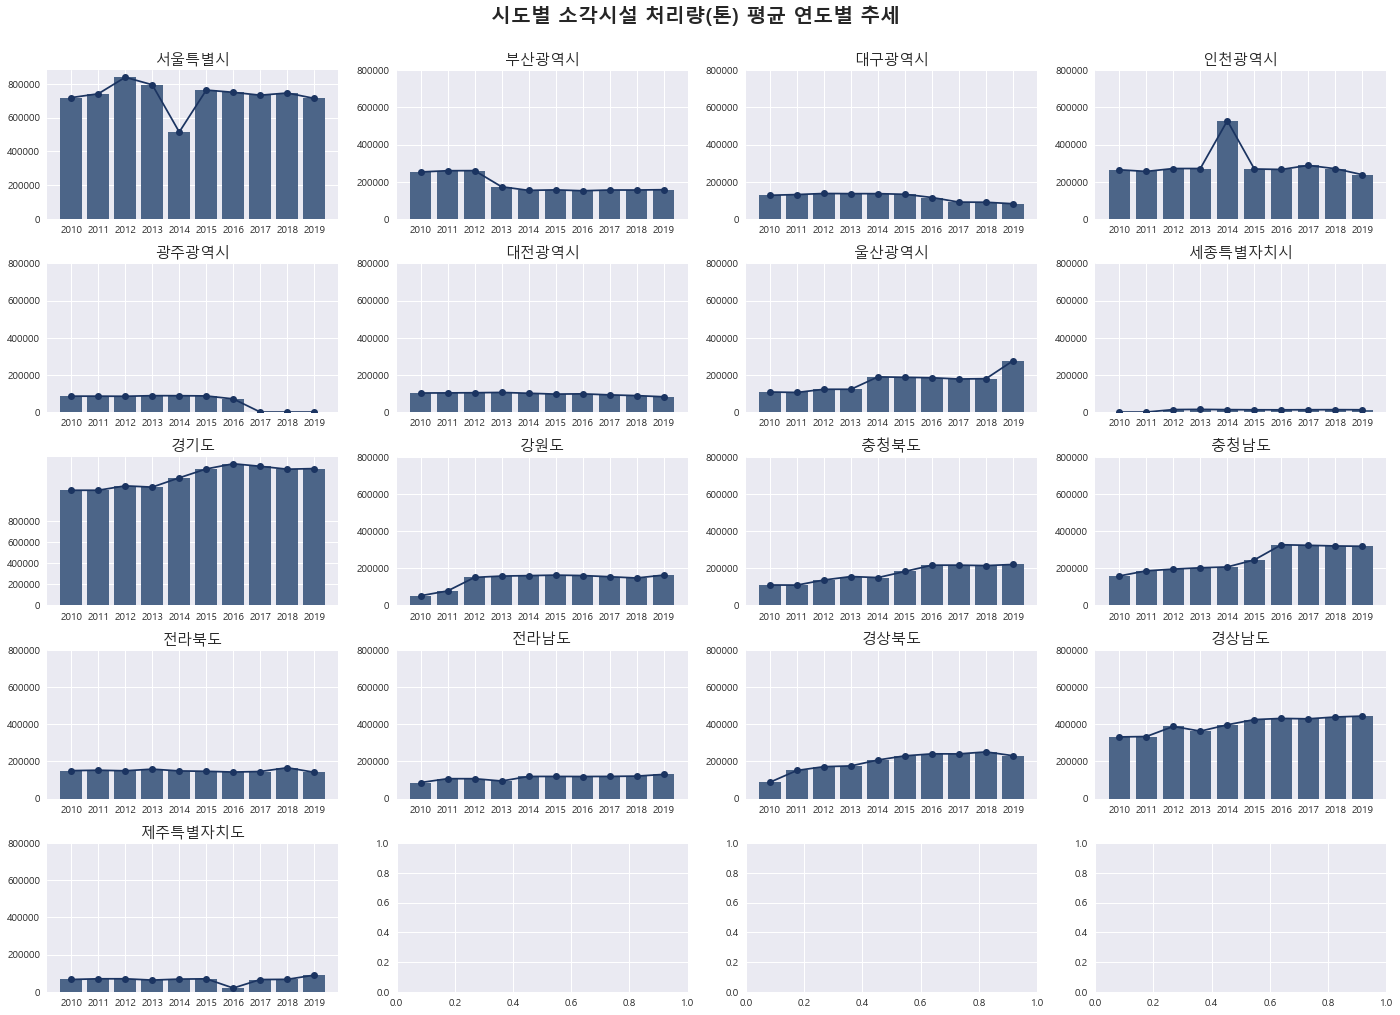

In [671]:
fig, axs = plt.subplots(5, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df['시도'].unique():
    sido_condition = df['시도']== i
    df_temp = df[sido_condition].groupby(df['연도'])[['시설 수', '일별 시설용량(톤)', '1일평균가동시간', '처리량 (톤)', '설치비 (국비)',
       '설치비 (지방비)', '설치비 (기타)', '연간유지관리비', '관리인원', '외부공급(열)', '외부공급(전력)',
       '자체사용(열)', '자체사용(전력)']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['연도'], df_temp['처리량 (톤)'], color='#4c6588')
    axs[ax, ay].plot(df_temp['연도'], df_temp['처리량 (톤)'], color='#1b3461', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 1000000, 200000)))
    axs[ax, ay].set_xticks(list(df['연도'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 소각시설 처리량(톤) 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

### 매립시설

### 1.0 데이터 불러오기

In [601]:
df2 = pd.read_csv("./data/지방자치단체_폐기물_처리시설_현황_매립시설(10-19).csv",encoding="utf-8")

### 2.0 데이터 탐색 및 전처리

In [602]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  160 non-null    int64 
 1   시도          160 non-null    object
 2   매립지 수       160 non-null    object
 3   총매립지 면적     160 non-null    object
 4   총매립 용량      160 non-null    object
 5   기매립량        160 non-null    object
 6   잔여매립가능량     160 non-null    object
 7   매립량(m³)     160 non-null    object
 8   매립량(톤)      160 non-null    object
 9   설치비 (국비)    160 non-null    object
 10  설치비 (지방비)   160 non-null    object
 11  설치비 (기타)    160 non-null    object
 12  연간유지관리비     160 non-null    object
 13  매립지 관리인원    160 non-null    object
 14  연도          160 non-null    int64 
dtypes: int64(2), object(13)
memory usage: 18.9+ KB


In [604]:
#첫번째 컬럼 삭제
df2 = df2.drop(df2.columns[[0]], axis=1)

In [605]:
df2

,시도,매립지 수,총매립지 면적,총매립 용량,기매립량,잔여매립가능량,매립량(m³),매립량(톤),설치비 (국비),설치비 (지방비),설치비 (기타),연간유지관리비,매립지 관리인원,연도
0,부산광역시,1,747922,24494000,12781728,11712272,310994,279895,88663,275139,0,3741,48,2010
1,대구광역시,1,585334,9224941,9040442,184499,51979,103958,0,23168,0,6539,55,2010
2,인천광역시,5,19793391,262536679,110562944,151973735,3845186,3762466,2400,375812,0,275320,220,2010
3,광주광역시,2,263966,2924906,2634605,290301,233269,675548,28138,62356,2050,3015,39,2010
4,대전광역시,1,680256,8762063,6576696,2185367,249500,249500,8043,146115,0,4668,41,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,전라북도,13,824184,8688939,7315125,1373814,212112,194865,65490,130454,642,5178,80,2019
156,전라남도,62,1393247,18924810,12319507,6605303,401217,263391,126716,197889,41026,14624,241,2019
157,경상북도,33,1036089,15848095,8575382,7272713,353382,238994,103427,244105,550,14819,182,2019
158,경상남도,25,1511712,23926134,13672646,10253488,586586,364811,84311,279923,14565,12759,124,2019


In [607]:
#2010,2011 세종 '-' 결측 / 2018,2019 광주 '-' 결측
df2.isnull().sum()
#'-'결측치 0으로 변경
df2.replace('-', '0', inplace=True)

In [608]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시도         160 non-null    object
 1   매립지 수      160 non-null    object
 2   총매립지 면적    160 non-null    object
 3   총매립 용량     160 non-null    object
 4   기매립량       160 non-null    object
 5   잔여매립가능량    160 non-null    object
 6   매립량(m³)    160 non-null    object
 7   매립량(톤)     160 non-null    object
 8   설치비 (국비)   160 non-null    object
 9   설치비 (지방비)  160 non-null    object
 10  설치비 (기타)   160 non-null    object
 11  연간유지관리비    160 non-null    object
 12  매립지 관리인원   160 non-null    object
 13  연도         160 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 17.6+ KB


In [609]:
df2['연도'] = df2['연도'].astype('object')

df2['매립지 수'] = df2['매립지 수'].astype('int')

df2['총매립지 면적'] = df2['총매립지 면적'].astype('float')

df2['총매립 용량'] = df2['총매립 용량'].astype('float')

df2['기매립량'] = df2['기매립량'].astype('float')

df2['잔여매립가능량'] = df2['잔여매립가능량'].astype('float')

df2['매립량(m³)'] = df2['매립량(m³)'].astype('float')

df2['매립량(톤)'] = df2['매립량(톤)'].astype('float')

df2['설치비 (국비)'] = df2['설치비 (국비)'].astype('float')

df2['설치비 (지방비)'] = df2['설치비 (지방비)'].astype('float')

df2['설치비 (기타)'] = df2['설치비 (기타)'].astype('float')

df2['연간유지관리비'] = df2['연간유지관리비'].astype('float')

df2['매립지 관리인원'] = df2['매립지 관리인원'].astype('int')


In [610]:
df2.describe()

,매립지 수,총매립지 면적,총매립 용량,기매립량,잔여매립가능량,매립량(m³),매립량(톤),설치비 (국비),설치비 (지방비),설치비 (기타),연간유지관리비,매립지 관리인원
count,160.000000,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,160.00000,160.000000,160.000000,160.00000,160.000000
mean,13.875000,1.793531e+06,2.825721e+07,1.443991e+07,1.381731e+07,5.044533e+05,4.184263e+05,50109.02500,155827.506250,13225.893750,39716.39375,87.868750
std,15.890644,4.060840e+06,6.286030e+07,3.044556e+07,3.275674e+07,9.131550e+05,7.630281e+05,36983.77864,104600.373426,20518.823156,110609.19922,76.064531
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,4.307278e+05,7.064656e+06,3.541050e+06,1.773011e+06,1.512652e+05,1.201332e+05,19398.00000,84581.500000,0.000000,3887.00000,36.750000
50%,9.500000,7.340600e+05,8.822798e+06,6.469542e+06,4.606310e+06,2.629845e+05,2.212995e+05,46860.00000,146115.000000,200.000000,6004.00000,55.000000
75%,18.000000,1.118756e+06,1.954491e+07,1.133613e+07,8.794745e+06,4.100270e+05,3.337025e+05,80865.50000,235994.750000,20384.000000,12644.25000,135.750000
max,62.000000,1.979339e+07,2.893474e+08,1.568891e+08,1.605080e+08,5.409171e+06,4.142707e+06,126716.00000,499298.000000,86406.000000,815366.00000,350.000000


In [611]:
df2.corr()

#매립지 면적과 매립 용량의 상관관계가 매우 높음
#매립지 면적과 용량이 클수록 연간유지관리비가 많이 드는 것으로 보임

,매립지 수,총매립지 면적,총매립 용량,기매립량,잔여매립가능량,매립량(m³),매립량(톤),설치비 (국비),설치비 (지방비),설치비 (기타),연간유지관리비,매립지 관리인원
매립지 수,1.000000,-0.063970,-0.109410,-0.097226,-0.119592,0.014283,-0.081362,0.714735,0.240266,0.255287,-0.023587,0.654484
총매립지 면적,-0.063970,1.000000,0.973967,0.968199,0.969160,0.878111,0.984111,-0.249326,0.659735,-0.145310,0.704672,0.639809
총매립 용량,-0.109410,0.973967,1.000000,0.994177,0.994972,0.871454,0.979599,-0.263033,0.687248,-0.171245,0.716826,0.633252
기매립량,-0.097226,0.968199,0.994177,1.000000,0.978385,0.866968,0.970092,-0.244789,0.699578,-0.164282,0.724669,0.650690
잔여매립가능량,-0.119592,0.969160,0.994972,0.978385,1.000000,0.866525,0.978207,-0.277244,0.668613,-0.175929,0.702053,0.610433
매립량(m³),0.014283,0.878111,0.871454,0.866968,0.866525,1.000000,0.899300,-0.171698,0.644014,-0.160857,0.618943,0.624164
매립량(톤),-0.081362,0.984111,0.979599,0.970092,0.978207,0.899300,1.000000,-0.248654,0.680281,-0.174149,0.691509,0.636057
설치비 (국비),0.714735,-0.249326,-0.263033,-0.244789,-0.277244,-0.171698,-0.248654,1.000000,0.360586,0.304832,-0.152383,0.390934
설치비 (지방비),0.240266,0.659735,0.687248,0.699578,0.668613,0.644014,0.680281,0.360586,1.000000,-0.217669,0.493336,0.733030
설치비 (기타),0.255287,-0.145310,-0.171245,-0.164282,-0.175929,-0.160857,-0.174149,0.304832,-0.217669,1.000000,-0.027231,0.060272


### 3.0 시각적 EDA

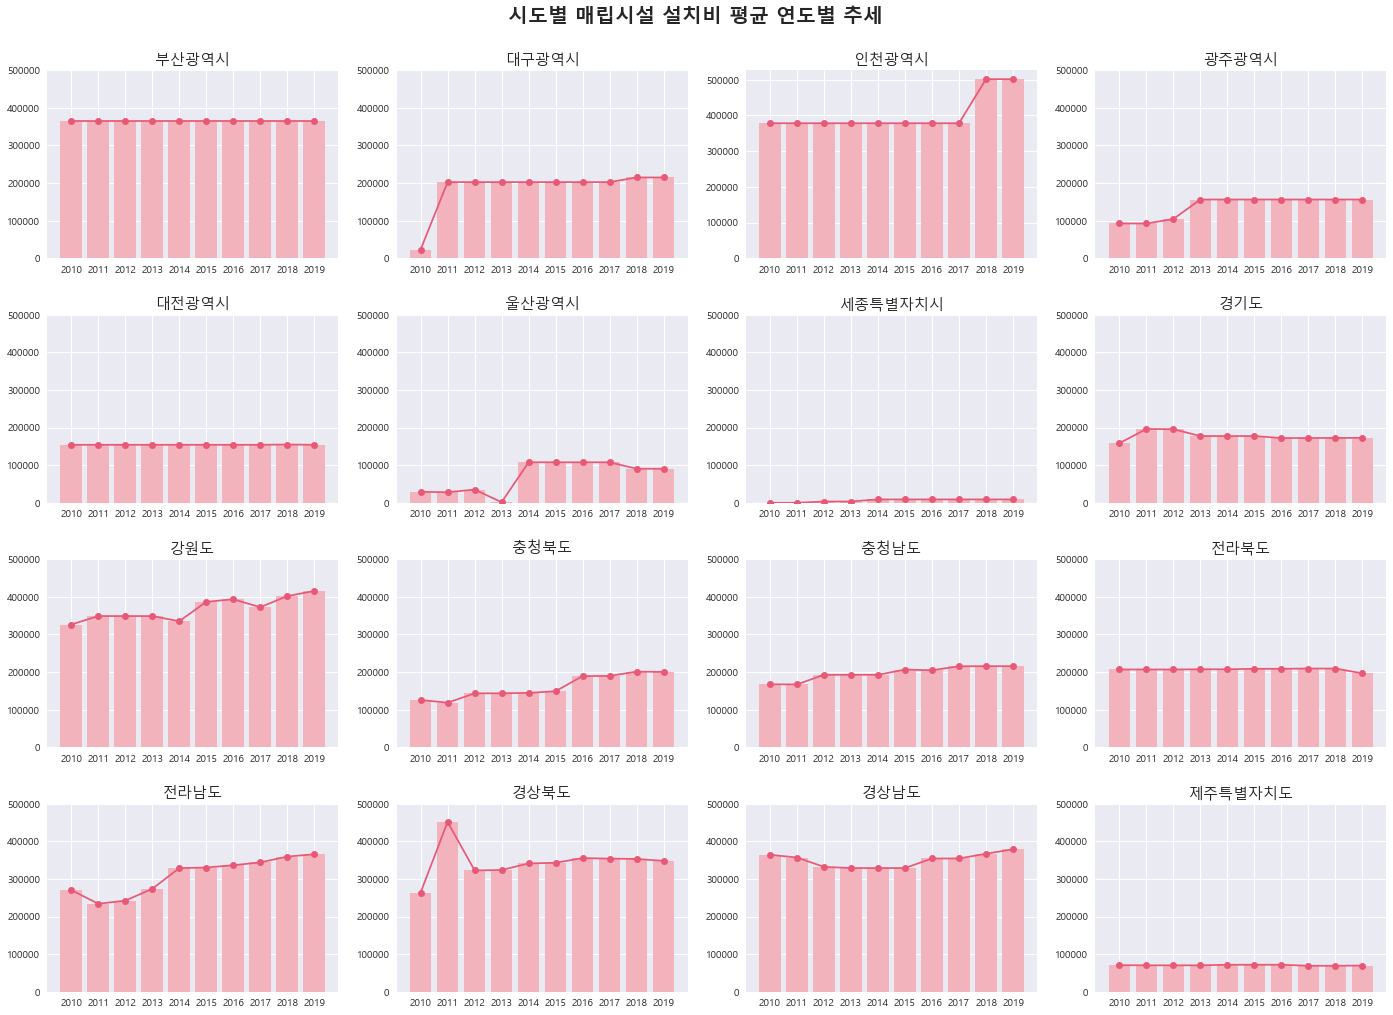

In [663]:
fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df2['시도'].unique():
    sido_condition = df2['시도']== i
    df_temp = df2[sido_condition].groupby(df2['연도'])[['매립지 수', '총매립지 면적', '총매립 용량', '기매립량', '잔여매립가능량', '매립량(m³)',
       '매립량(톤)', '설치비 (국비)', '설치비 (지방비)', '설치비 (기타)', '연간유지관리비', '매립지 관리인원']].mean().reset_index()
    in_sum = df_temp[['설치비 (국비)','설치비 (지방비)','설치비 (기타)']].sum(axis=1)
    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['연도'], in_sum, color='#f2b3bc')
    axs[ax, ay].plot(df_temp['연도'], in_sum, color='#e85977', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 500001, 100000)))
    axs[ax, ay].set_xticks(list(df2['연도'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 매립시설 설치비 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

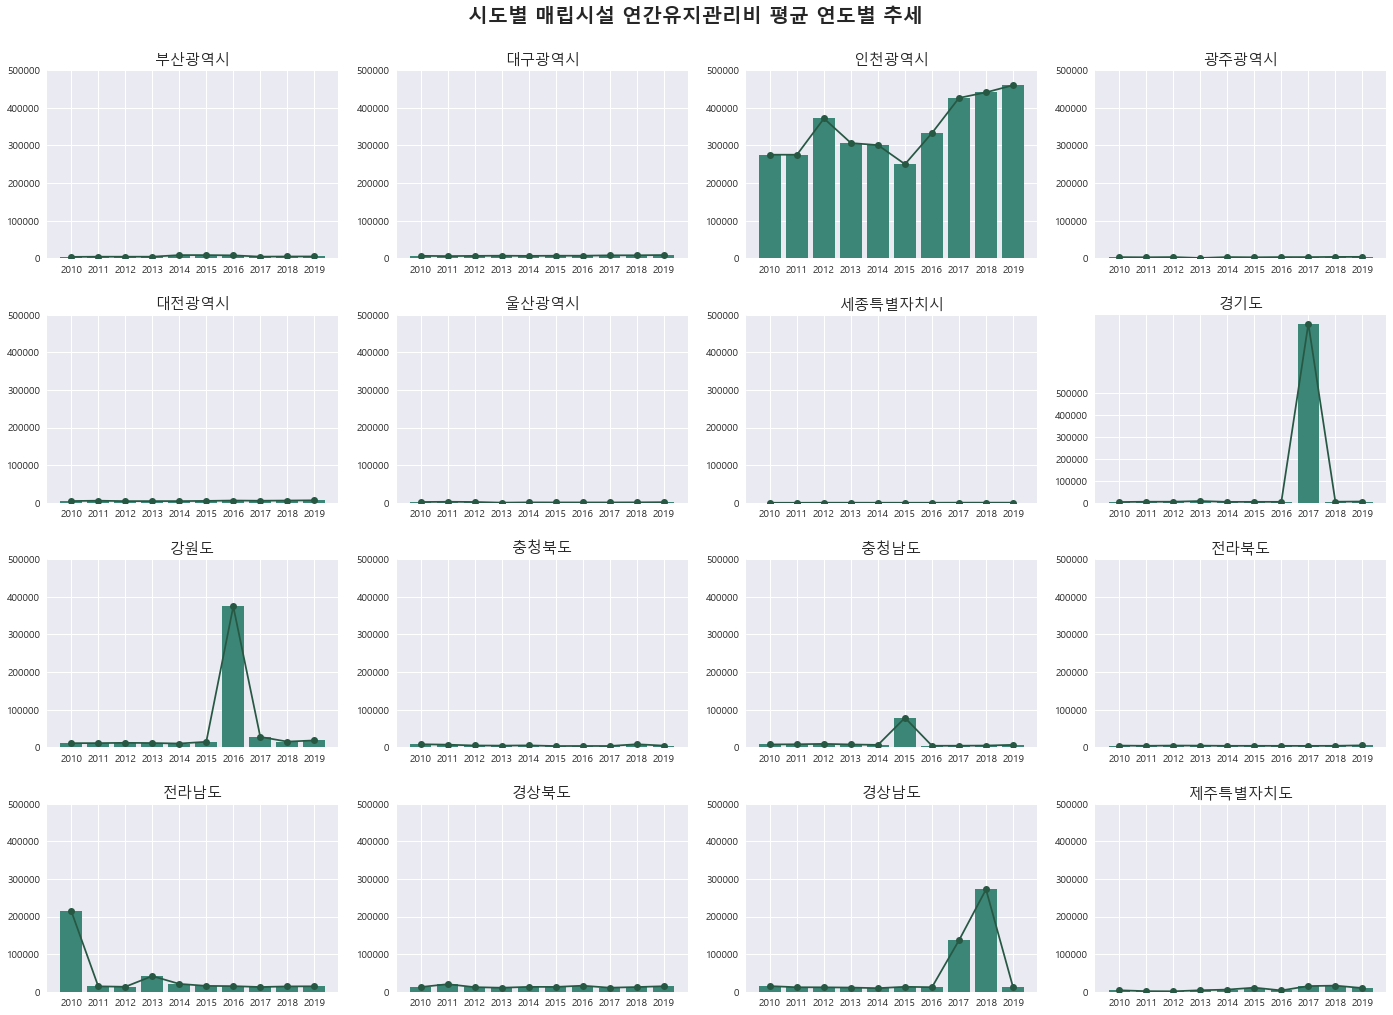

In [668]:
fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df2['시도'].unique():
    sido_condition = df2['시도']== i
    df_temp = df2[sido_condition].groupby(df2['연도'])[['매립지 수', '총매립지 면적', '총매립 용량', '기매립량', '잔여매립가능량', '매립량(m³)',
       '매립량(톤)', '설치비 (국비)', '설치비 (지방비)', '설치비 (기타)', '연간유지관리비', '매립지 관리인원']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['연도'], df_temp['연간유지관리비'], color='#3c8677')
    axs[ax, ay].plot(df_temp['연도'], df_temp['연간유지관리비'], color='#275843', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 500001, 100000)))
    axs[ax, ay].set_xticks(list(df2['연도'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 매립시설 연간유지관리비 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

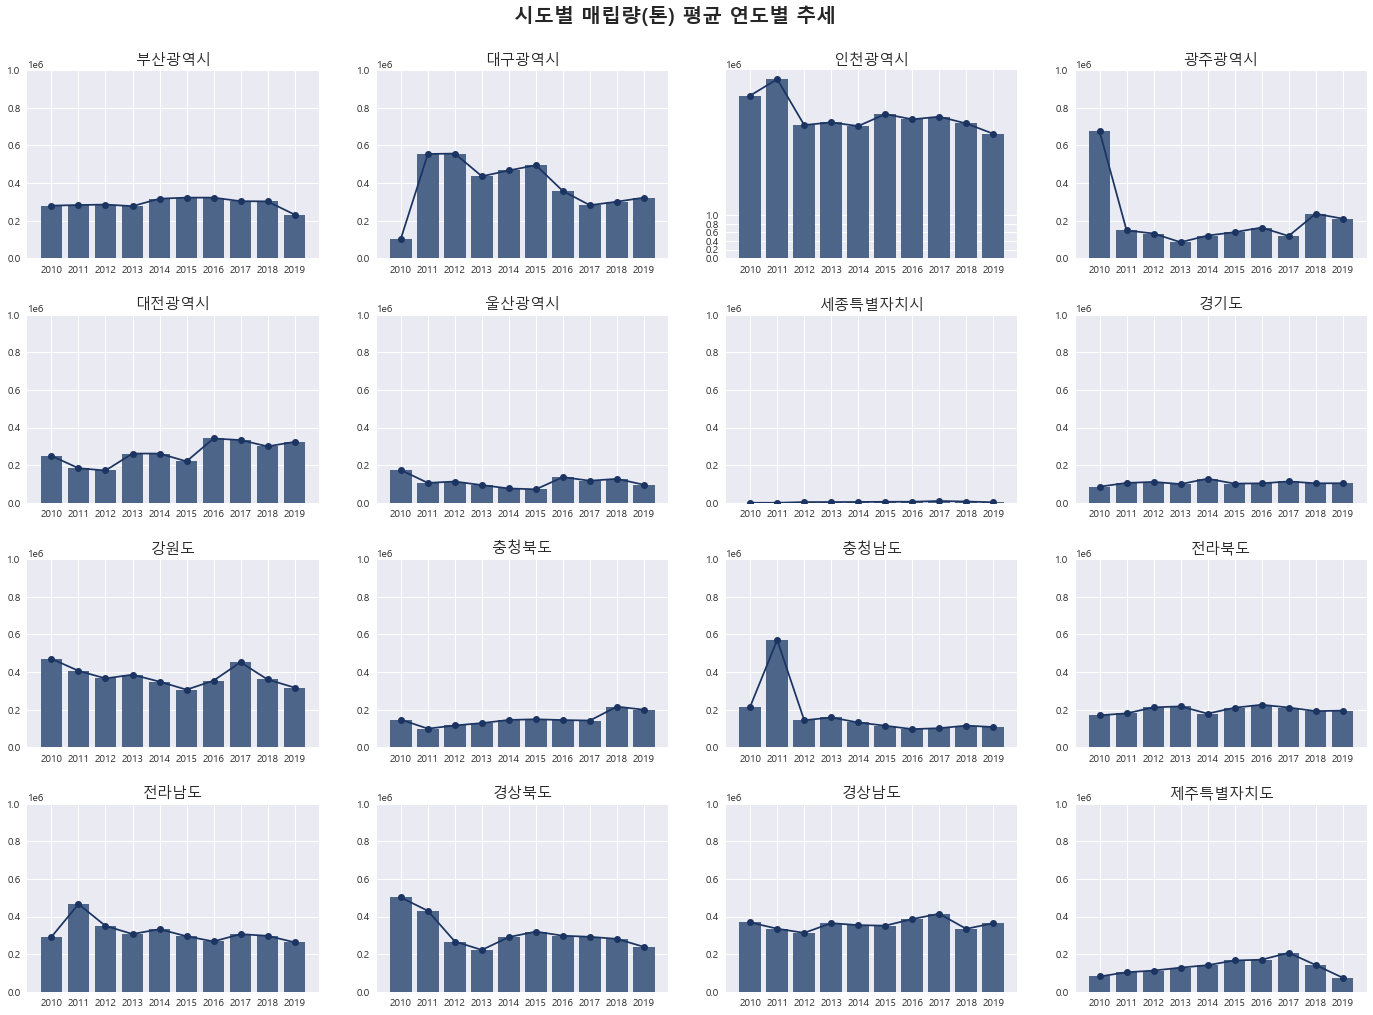

In [673]:
fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df2['시도'].unique():
    sido_condition = df2['시도']== i
    df_temp = df2[sido_condition].groupby(df2['연도'])[['매립지 수', '총매립지 면적', '총매립 용량', '기매립량', '잔여매립가능량', '매립량(m³)',
       '매립량(톤)', '설치비 (국비)', '설치비 (지방비)', '설치비 (기타)', '연간유지관리비', '매립지 관리인원']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['연도'], df_temp['매립량(톤)'], color='#4c6588')
    axs[ax, ay].plot(df_temp['연도'], df_temp['매립량(톤)'], color='#1b3461', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 1000001, 200000)))
    axs[ax, ay].set_xticks(list(df2['연도'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 매립량(톤) 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

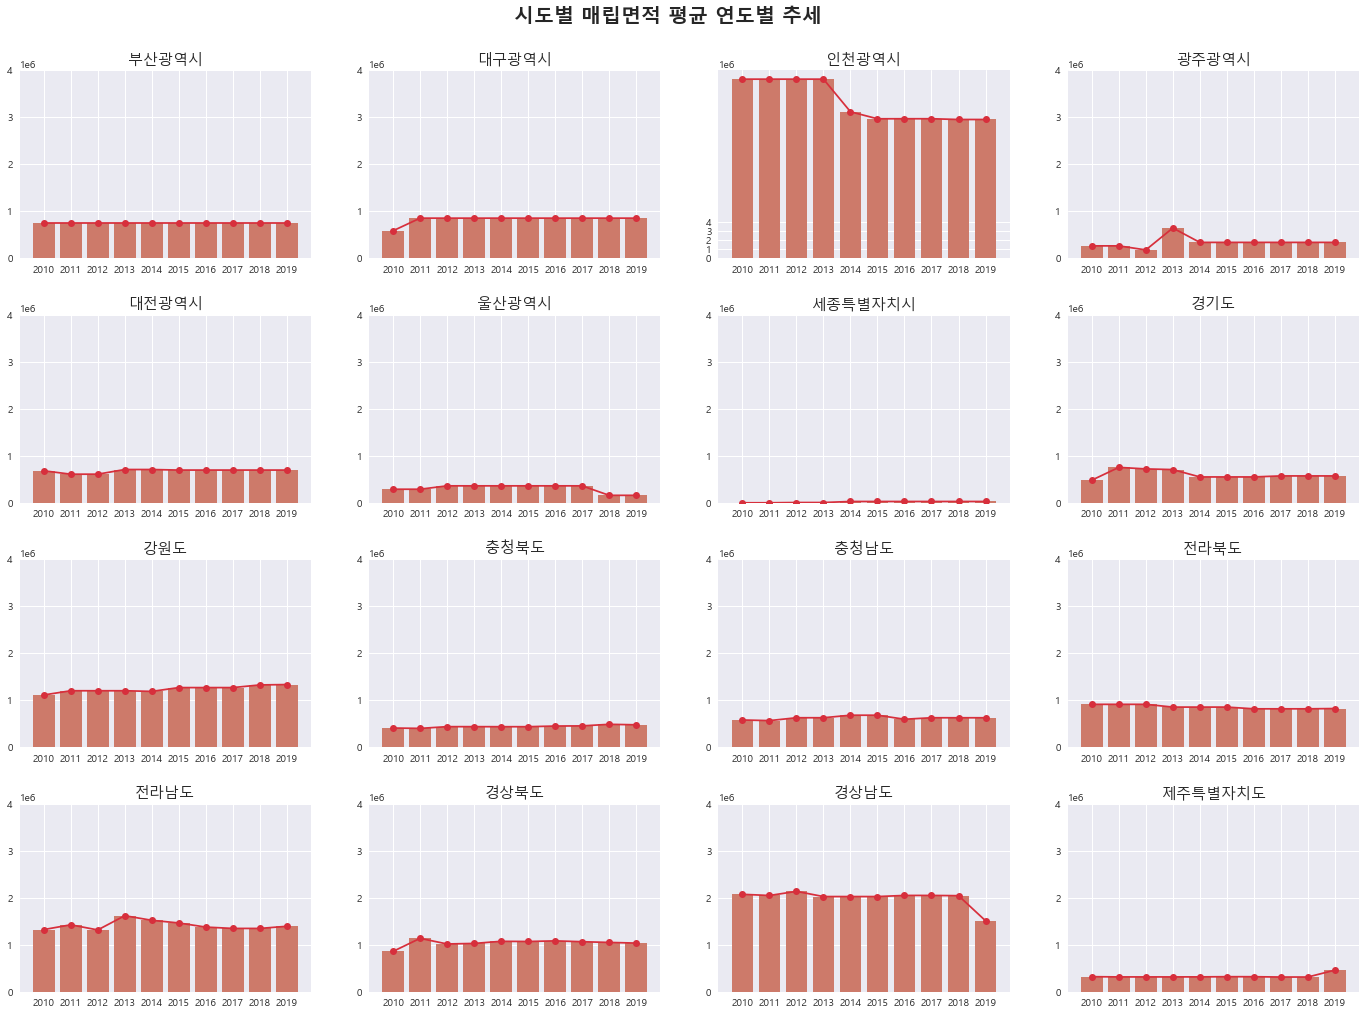

In [676]:
fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df2['시도'].unique():
    sido_condition = df2['시도']== i
    df_temp = df2[sido_condition].groupby(df2['연도'])[['매립지 수', '총매립지 면적', '총매립 용량', '기매립량', '잔여매립가능량', '매립량(m³)',
       '매립량(톤)', '설치비 (국비)', '설치비 (지방비)', '설치비 (기타)', '연간유지관리비', '매립지 관리인원']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['연도'], df_temp['총매립지 면적'], color='#cd7a6a')
    axs[ax, ay].plot(df_temp['연도'], df_temp['총매립지 면적'], color='#d72f3c', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 5000000, 1000000)))
    axs[ax, ay].set_xticks(list(df2['연도'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 매립면적 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()